In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xbbg import blp

In [88]:
def GetRet(Liste, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= [x + " Equity" for x in Liste],start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret = Ret.T.mean()
    return Ret

def GetBench(Index, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= Index + " Index",start_date = Start , end_date = End)
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret.columns = [Index]
    return Ret

def Plot(Ret):
    Ret = Ret + 1
    if type(Ret) == type(pd.Series(0)):
        Ret[0] = 100
    else:
        Ret.iloc[0,0] = 100
    plt.plot(Ret.cumprod())

In [134]:
EL =  ['GWW UN','HPQ UN','HLT UN','IFF UN','AAPL UW','IBM UN','GS UN','ES UN','FTI UN','HD UN']
ES = ['GM UN','ODFL UW','FLIR UW','AOS UN','FRC UN','CPRI UN','VRTX UW','AJG UN','HRB UN','CHRW UW']

SL = ['NLOK UW','HES UN','ACN UN','GPS UN','EW UN','INTC UW','IBM UN','SBUX UW','HPQ UN','MSFT UW']
SS = ['EVRG UN','CINF UW','BA UN','BRK/B UN','MCK UN','WYNN UW','CFG UN','NUE UN','UHS UN','LEN UN']

GL = ['NOC UN','CAH UN','ADS UN','MA UN','TROW UW','ACN UN','TEL UN','NTRS UW','TSCO UW','STT UN']
GS = ['AIG UN','NOV UN','WFC UN','GOOG UW','GOOGL UW','DISH UW','SYK UN','FB UW','NFLX UW','UHS UN']

In [135]:
Bench = GetBench("SPX", Start = "20190101")

In [136]:
EL = GetRet(EL, Start = "20190101")
ES = GetRet(ES, Start = "20190101")
ESpread = EL - ES

SL = GetRet(SL, Start = "20190101")
SS = GetRet(SS, Start = "20190101")
SSpread = SL - SS

GL = GetRet(GL, Start = "20190101")
GS = GetRet(GS, Start = "20190101")
GSpread = GL - GS

In [138]:
ML = EL + SL + GL
MS = ES + SS + GS
MSpread = ML - MS

[]

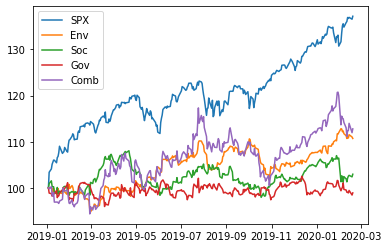

In [139]:
Plot(Bench)
Plot(ESpread)
Plot(SSpread)
Plot(GSpread)
Plot(MSpread)
plt.legend(["SPX", "Env", "Soc", "Gov", "Comb"])
plt.plot()

In [185]:
Env = ["UL US","PCRFF US", "AGN UN", "IBM US", "ADBE UW", "NKE UN"]

In [186]:
Bench = GetBench("SPX", Start = "20190101")

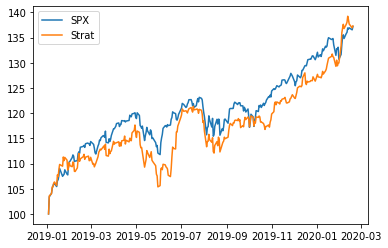

In [188]:
Date = "20190101"

Plot(Bench)
Plot(GetRet(Env, Start = Date))
plt.legend(["SPX", "Strat"])
plt.show()

In [196]:
Plot(Strat - Bench.values)
plt.show()

Exception: Data must be 1-dimensional